In [28]:
import os, pandas, numpy, systole, systole.reports
from pathlib import Path
from systole.plots import plot_frequency
import matplotlib.pyplot as plt

csv_file = "2023-04-07-11-12-19.csv"
ibi = pandas.read_csv (os.path.join (Path.cwd (), csv_file), usecols = ['interbeat_intervals'])
ibi = ibi.to_numpy (dtype = numpy.float64).flatten ()

## Time Domain

Deviation based indices:
* **SDNN** is the standard deviation of the normal beat intervals (denoted NN intervals). It encompasses both short-term high 
frequency variation (mostly due to parasympathetically-mediated RSA) and long-term low frequency components of the HR 
signals. Some proponents argue that the accuracy of SDNN is higher for longer recording periods, especially over 24 h 
periods where values of SDNN have been used for cardiac risk stratification in medical settings.

Difference based indices:
* **SDSD**, standard deviation of successive difference
* **RMSSD**, root mean square successive difference. More influenced by the parasympathetic nervous system (PNS) activity 
  and hence is often used to estimate the vagally mediated fluctuations in HR. Its statistical robustness makes it 
  well-suited for short-term time windows.
* **nn50**, **pnn50**, amount and proportion of successive intervals with threshold larger than 50 ms.

===========  ======================  =========
Variable     Units                       Value
===========  ======================  =========
Mean RR      milliseconds (ms)        835.2384
Median RR    milliseconds (ms)        844.0000
Minimun RR   milliseconds (ms)        530.0000
Maximum RR   milliseconds (ms)       1064.0000

Mean BPM     beats per minute (bpm)    72.8244
Median BPM   beats per minute (bpm)    71.0900
Minimun BPM  beats per minute (bpm)    56.3910
Maximum BPM  beats per minute (bpm)   113.2075

SDNN         milliseconds (ms)         92.5817
SDSD         milliseconds (ms)         39.6368
RMSSD        milliseconds (ms)         39.6296
nn50         counts                   606.0000
pnn50        %                         21.9964
===========  ======================  =========


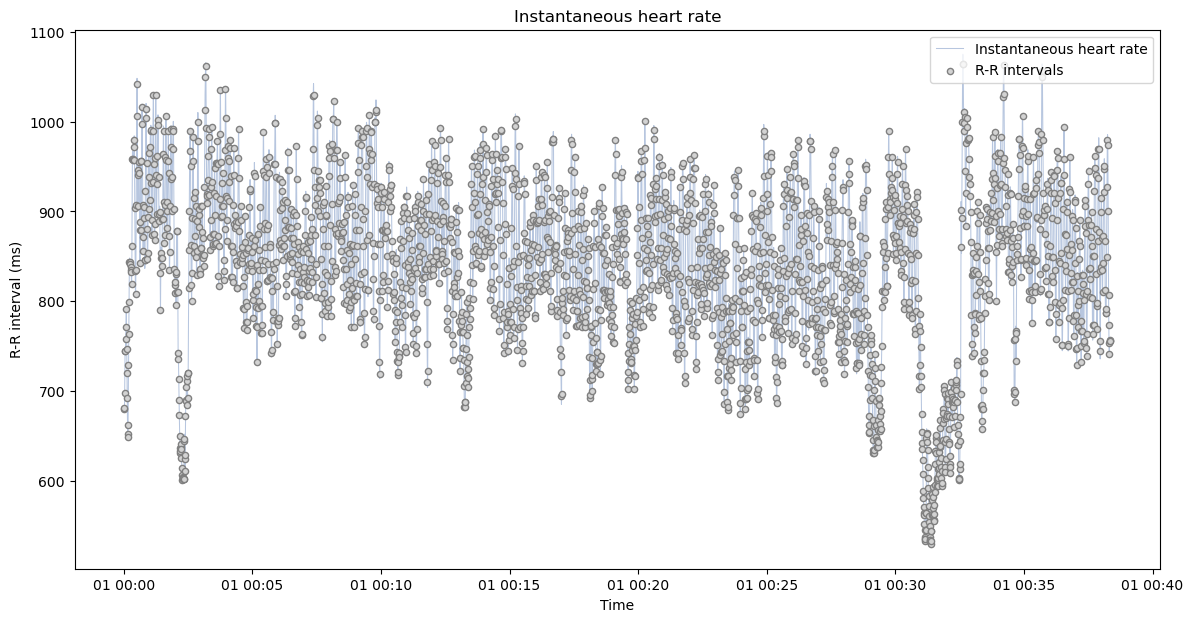

In [23]:
print (systole.reports.time_table (ibi))
systole.plots.plot_rr (ibi, show_artefacts = True, input_type = "rr_ms", figsize = (14, 7));

## Frequency Domain
As different regulatory systems modulate HR at distinct frequencies, frequency-domain indices reflect that distribution 
of power across different frequencies bands. Note that these fail to account for temporal variation.

Generally, due to the inherent differences in their signaling mechanisms, the parasympathetic (vagal) modulation of HR, 
including RSA, is faster than the sympathetic activities. Thus, research suggests that HF and LF are prominent 
reflections of parasympathetic and sympathetic activity. The ratio of LF to HF power (LF/HF) has also been commonly used 
as an index of the sympathovagal balance - a measure of the relative contributions of SNS to PNS activity.

* **HF**, relatively established as an index of the parasympathetic modulation of HR.
* **LF**, the interpretation of LF power as an index of sympathetic activities has been repeatedly challenged. It is 
  modulated by both ANS (autonomic nervous system) branches as well as baroreceptor activities.
* **ULF**, **VLF**, former (< 0.003Hz) often being associated with very low-frequency biological processes such as 
  circadian rhythms or metabolisms and the latter with body temperature regulation and vasomotor activity.

Limitation of the frequency-domain approach is pertaining to the inherent differences in the outputs of different 
spectral analysis algorithms. To allow for more reliable comparison of frequency components across studies, the spectral 
indices are often normalized by dividing the individual component by the total power (here, Power %).

=================  ============  =============  ===========  ==============
Frequency Band       Peaks (Hz)    Power (ms²)    Power (%)    Power (n.u.)
=================  ============  =============  ===========  ==============
VLF (0-0.04 Hz)          0.0039      3378.2376      54.9507
LF (0.04-0.15 Hz)        0.1484      2132.6567      34.6900         77.0046
HF (0.15-0.4 Hz)         0.1523       636.8621      10.3593         22.9954
Total                                6147.7564
LF/HF                                   3.3487
=================  ============  =============  ===========  ==============


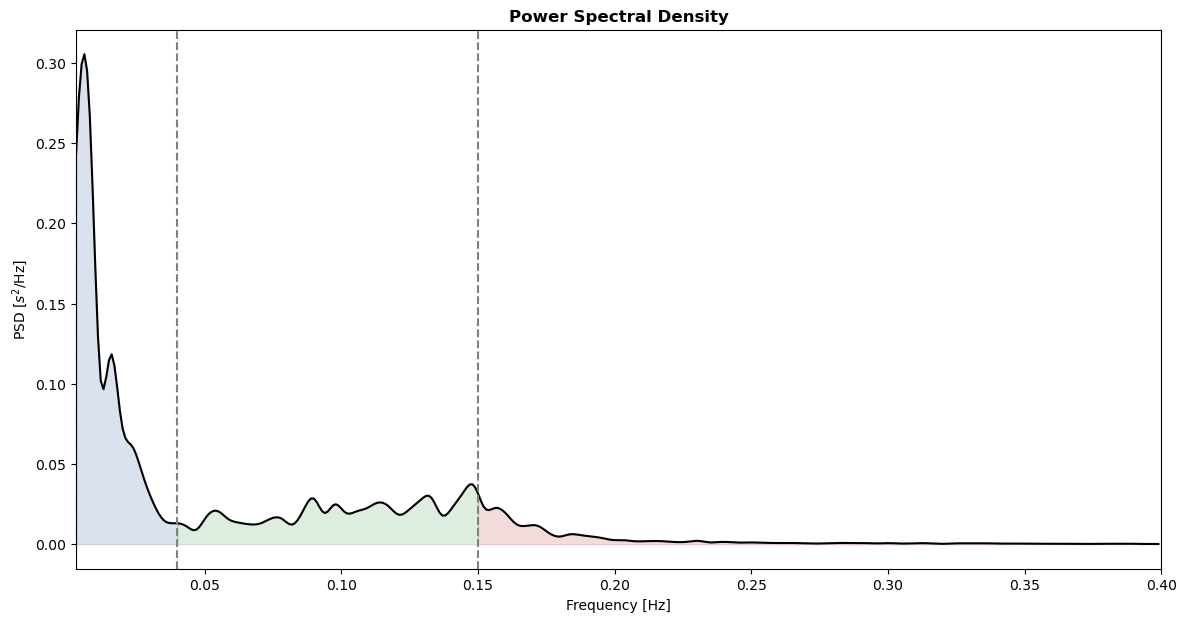

In [25]:
print (systole.reports.frequency_table (ibi))
plot_frequency (ibi, input_type = "rr_ms", figsize = (14, 7));

## Non-linear Domain

The Poincaré plot is a scatterplot of each NN/RR interval plotted against its corresponding preceding interval RR(n+1), 
which approximates the cardiac system’s evolution. The points are dispersed around the identity line and converge into 
an ellipsoid configuration. Points above the line represent HR decelerations (NN intervals that are longer than 
preceding ones) and points below the line of identity indicate HR accelerations.

Qualitatively, the Poincaré plot’s shape provides a visual summary of the heart’s behavior. From the plot, outliers such 
as premature heartbeats and other technical artefacts can be easily removed, something which cannot be done with 
spectral and most time-domain analyses. On a quantitative level, indices extracted from the plot correspond to 
time-domain indices. 

* **SD1** is the standard deviation of points perpendicular to the identity line and is equivalent to RMSSD, describing 
short-term NN variability. 
* **SD2** is the standard deviation of points parallel to the line of identity and is equivalent to SDNN, representing 
long-term NN variability. 

The former reflects short-term vagal activity whereas the latter represents sympathetic modulation. A third index, 
SD1/SD2, describes the ratio of short to long-term variations in NN interval fluctuations and reflects sympathovagal 
balance. SD1/SD2 has been shown to additionally capture complexity in HR patterns (e.g., healthy heart displays a 
“comet” shaped Poincaré plot while cardiac abnormalities display atypical “fan” or “complex” shapes). However, SD1/SD2 
seems to be sensitive to the time lag used, with some recent research recommending a lag of five or six heartbeats. 

========================  =================  =========
Variable                  Units                  Value
========================  =================  =========
-- Poincaré plot --
SD1                       milliseconds (ms)    28.0224
SD2                       milliseconds (ms)   127.8721

-- Recurrence plot --
Mean line length (Lmean)  beats                15.0778
Max line length (Lmax)    beats              2746.0000
Recurrence rate (REC)     %                    41.1024
Determinism (DET)         %                    75.6763
Shannon Entropy (ShanEn)                        3.5165
========================  =================  =========


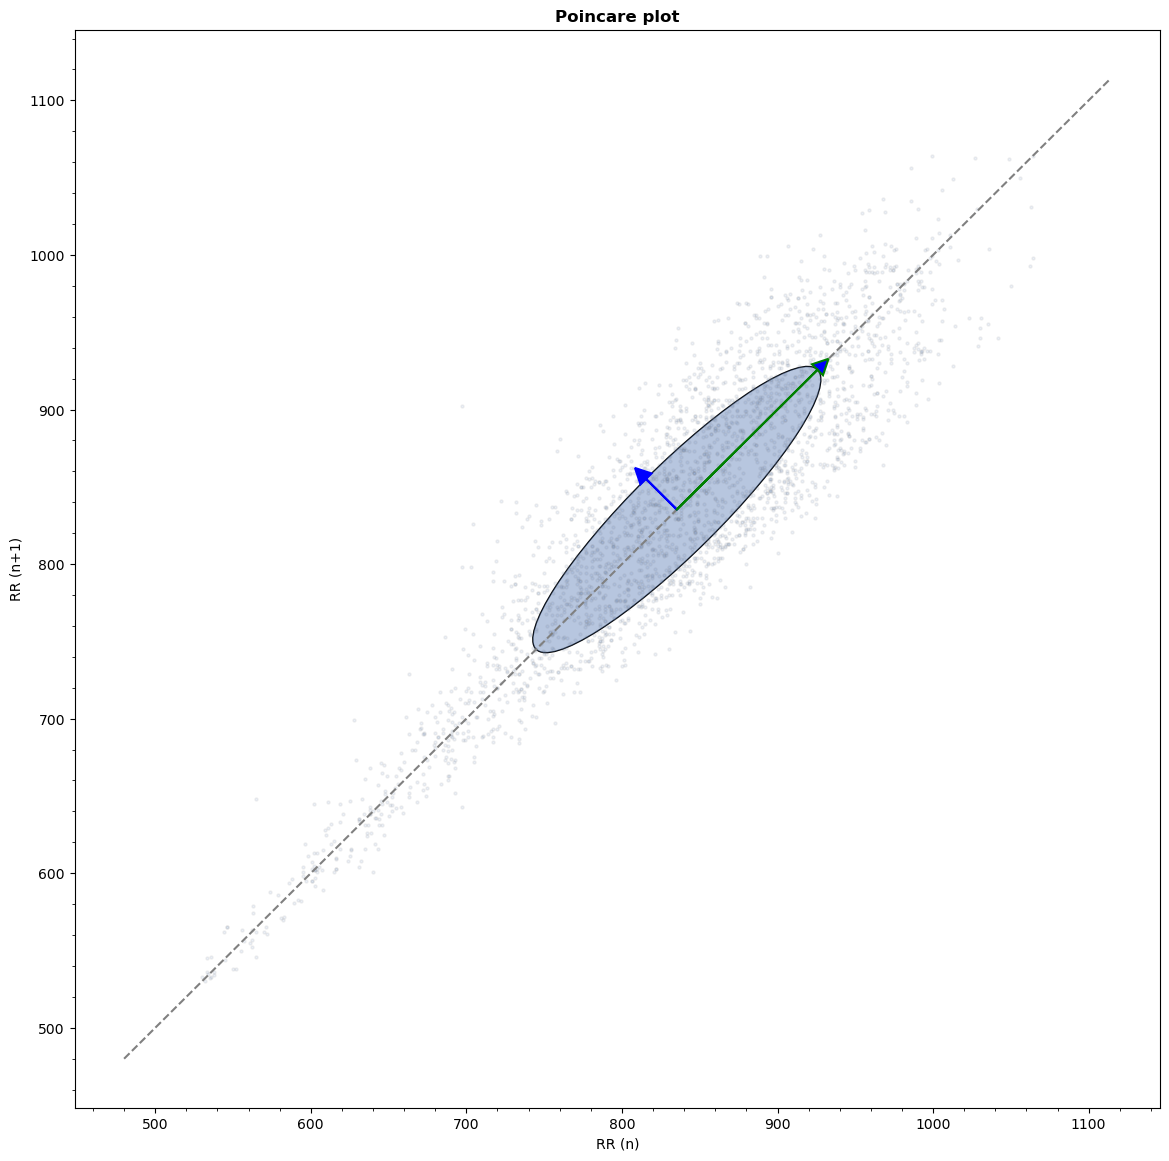

In [21]:
print (systole.reports.nonlinear_table (ibi))
systole.plots.plot_poincare (ibi, input_type = "rr_ms", figsize = (14, 14));

## Outliers and artefacts

* Missed R peaks, when an existing R component was erroneously NOT detected by the algorithm. 
* Extra R peaks, when an R peak was detected but does not exist in the signal. 
* Long or short interval intervals, when R peaks are correctly detected but the resulting interval has extreme value in 
  the overall time-series. 
* Ectopic beats, due to disturbance of the cardiac rhythm when the heart either skip or add an extra beat. 

The left panel plot subspaces that are more sensitive to ectopic beats detection. The right panel plot subspaces that 
will be more sensitive to long or short beats, comprizing the extra and missed beats. In the figure, the grey areas 
indicate the range of unlikely values considering each artefacts subtype. The intervals that are falling in these areas 
will be labelled as irregular.

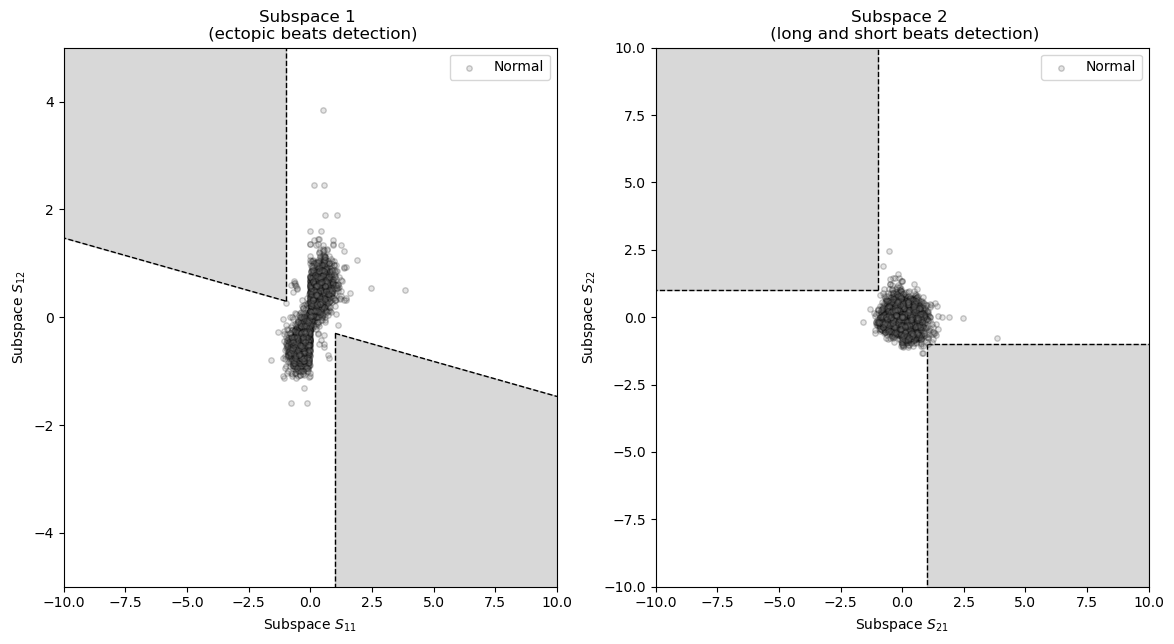

In [32]:
_, ax = plt.subplots (ncols = 2, figsize = (14, 7))
systole.plots.plot_subspaces (ibi , input_type = "rr_ms", ax=ax);

## References
* [Heart Rate Variability in Psychology: A Review of HRV Indices and an Analysis Tutoria](https://www.mdpi.com/1424-8220/21/12/3998)  
The use of heart rate variability (HRV) in research has been greatly popularized over the past decades due to the ease and affordability of HRV collection, coupled with its clinical relevance and significant relationships with psychophysiological constructs and psychopathological disorders. Despite the wide use of electrocardiograms (ECG) in research and advancements in sensor technology, the analytical approach and steps applied to obtain HRV measures can be seen as complex. Thus, this poses a challenge to users who may not have the adequate background knowledge to obtain the HRV indices reliably. To maximize the impact of HRV-related research and its reproducibility, parallel advances in users’ understanding of the indices and the standardization of analysis pipelines in its utility will be crucial. This paper addresses this gap and aims to provide an overview of the most up-to-date and commonly used HRV indices, as well as common research areas in which these indices have proven to be very useful, particularly in psychology. In addition, we also provide a step-by-step guide on how to perform HRV analysis using an integrative neurophysiological toolkit, NeuroKit2.
* [A robust algorithm for heart rate variability time series artefact correction using novel beat classification](https://www.tandfonline.com/doi/abs/10.1080/03091902.2019.1640306)  
The sensitivity of the algorithm to detect simulated missed/extra beats was 100%. The sensitivity to detect real atrial and ventricular ectopic beats was 96.96%, the corresponding specificity being 99.94%. The mean error in HRV parameters after correction was <2% for missed and extra beats as well as for misaligned beats generated with large displacement factors. Misaligned beats with smallest displacement factor were the most difficult to detect and resulted in largest HRV parameter errors after correction, largest errors being <8%.
* https://en.wikipedia.org/wiki/Heart_rate_variability